In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("C:\\Users\\Sandra Kimiring\\OneDrive\\Desktop\\MVR.csv")


In [3]:
df.head()

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
0,2008-06-02,30.926001,32.000000,30.257000,32.000000,29.529486,50620000,21.552500,21.737499,21.150000,21.517500,19.202324,36856000
1,2008-06-03,31.386999,31.399000,30.235001,30.740000,28.366755,93913000,21.752501,21.987499,21.507500,21.889999,19.534735,48411600
2,2008-06-04,30.745001,30.959999,29.454000,29.740000,27.443956,66160000,21.770000,22.025000,21.320000,21.370001,19.070698,40684400
3,2008-06-05,29.951000,30.615999,29.544001,30.615999,28.252338,45959000,21.615000,21.809999,21.397499,21.809999,19.463354,27059600
4,2008-06-06,30.228001,30.242001,29.481001,29.573000,27.289856,29383000,21.475000,21.497499,20.887501,20.912500,18.662413,41748000


In [4]:
df.shape

(4047, 13)

In [5]:
df.describe()

,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
count,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03
mean,164.535600,166.170139,162.857876,164.563858,160.646182,8.249296e+06,107.988356,108.965956,106.999128,108.003625,104.551613,1.386969e+07
std,138.620480,139.946015,137.248286,138.635551,138.057771,1.140882e+07,82.319225,83.020901,81.600647,82.319975,81.900950,1.469735e+07
min,12.100000,12.736000,11.305000,11.918000,11.024753,6.411000e+05,10.672500,11.047500,10.445000,10.605000,9.496159,1.640900e+06
25%,42.459502,42.865499,42.062000,42.452500,39.624086,2.988750e+06,30.157500,30.582501,29.888750,30.253750,27.724516,6.652450e+06
50%,97.440002,98.089996,96.699997,97.599998,92.752449,4.409000e+06,78.690002,79.349998,78.150002,78.620003,74.387733,9.420400e+06
75%,304.414994,306.979995,300.304993,303.910004,297.765701,8.251500e+06,193.044998,195.095001,190.185005,192.940002,187.882408,1.526840e+07
max,488.529999,490.000000,483.640015,488.640015,487.964142,1.787220e+08,290.000000,290.959991,287.899994,290.369995,289.833618,3.375336e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4047 non-null   object 
 1   Open_M       4047 non-null   float64
 2   High_M       4047 non-null   float64
 3   Low_M        4047 non-null   float64
 4   Close_M      4047 non-null   float64
 5   Adj Close_M  4047 non-null   float64
 6   Volume_M     4047 non-null   int64  
 7   Open_V       4047 non-null   float64
 8   High_V       4047 non-null   float64
 9   Low_V        4047 non-null   float64
 10  Close_V      4047 non-null   float64
 11  Adj Close_V  4047 non-null   float64
 12  Volume_V     4047 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 411.2+ KB


In [7]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
#📊 Exploratory Data Analysis (EDA)
#📈 Stock Prices Over Time

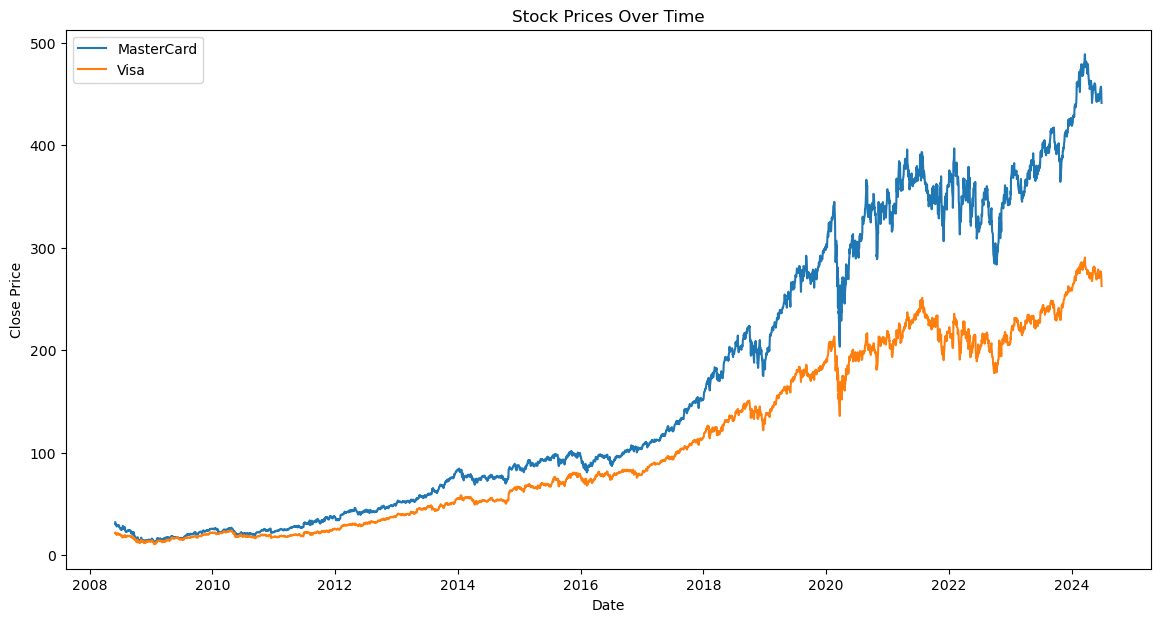

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close_M'], label='MasterCard')
plt.plot(df['Date'], df['Close_V'], label='Visa')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

C:\Users\Sandra Kimiring\anaconda777\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sandra Kimiring\anaconda777\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


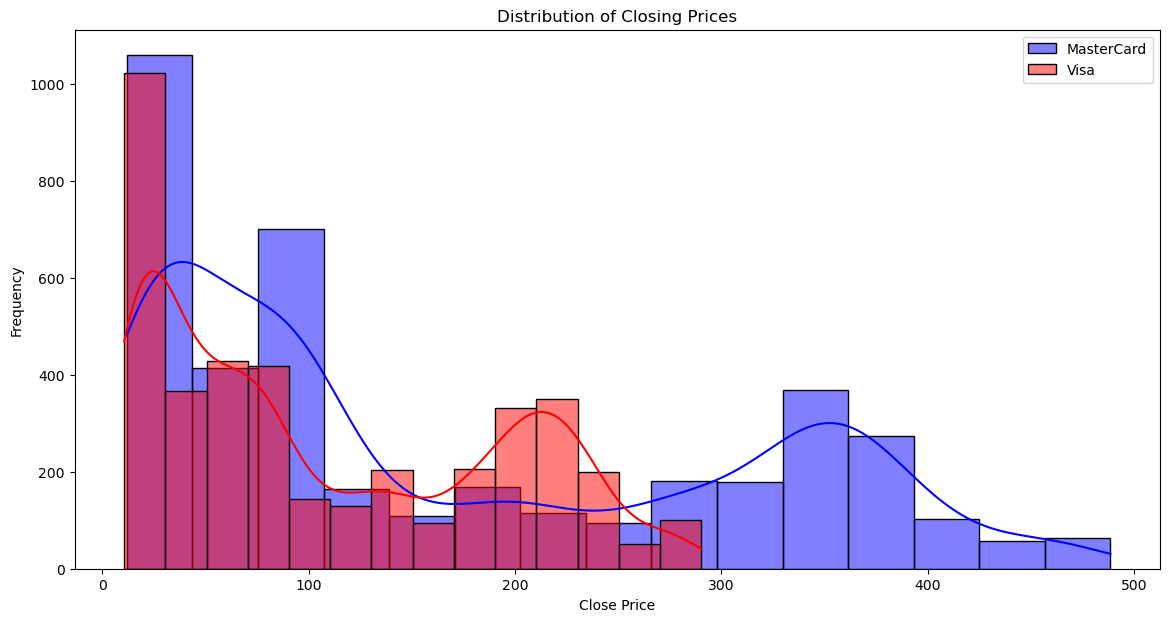

In [11]:
#📉 Distribution of Closing Prices
plt.figure(figsize=(14, 7))
sns.histplot(df['Close_M'], kde=True, color='blue', label='MasterCard')
sns.histplot(df['Close_V'], kde=True, color='red', label='Visa')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\Sandra Kimiring\AppData\Local\Temp\ipykernel_21568\2300877712.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Close_M'], shade=True, color='blue', label='MasterCard')
C:\Users\Sandra Kimiring\anaconda777\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sandra Kimiring\AppData\Local\Temp\ipykernel_21568\2300877712.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Close_V'], shade=True, color='red', label='Visa')
C:\Users\Sandra Kimiring\anaconda777\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opt

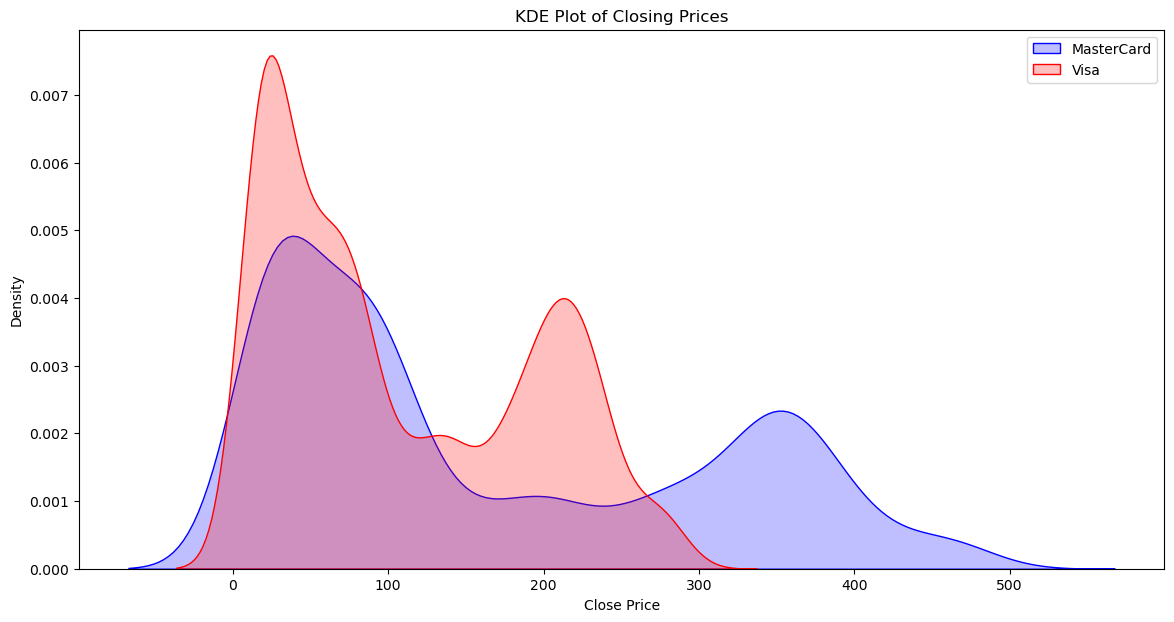

In [12]:
#📉 KDE Plot of Closing Prices
plt.figure(figsize=(14, 7))
sns.kdeplot(df['Close_M'], shade=True, color='blue', label='MasterCard')
sns.kdeplot(df['Close_V'], shade=True, color='red', label='Visa')
plt.title('KDE Plot of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.legend()
plt.show()

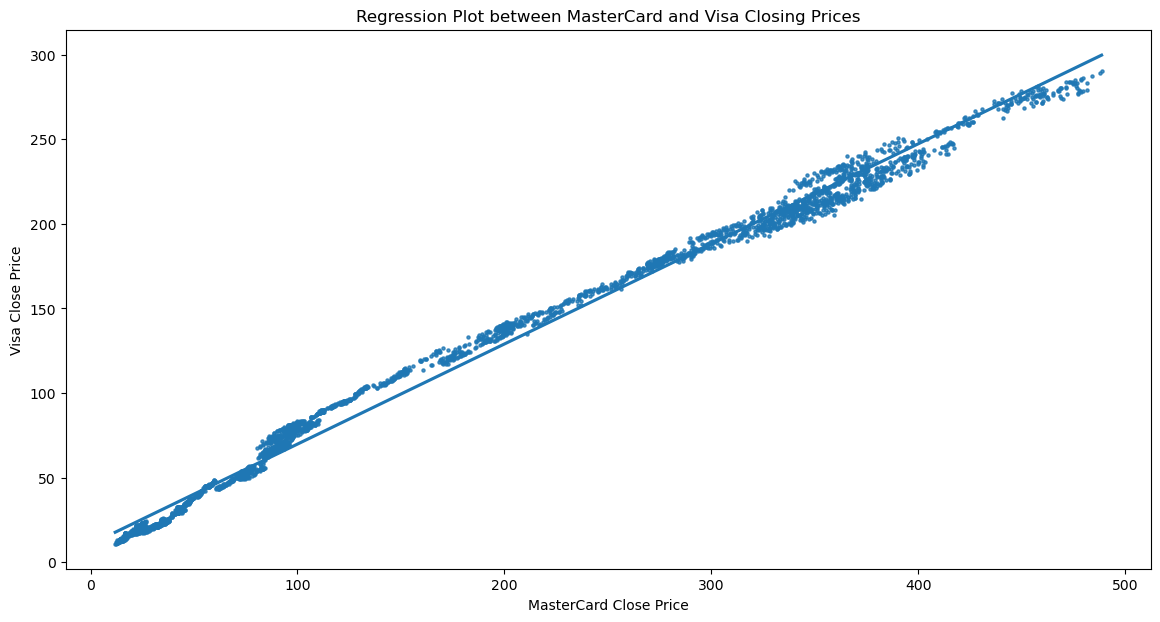

In [13]:
#📊 Regression Plot of Closing Prices
plt.figure(figsize=(14, 7))
sns.regplot(x=df['Close_M'], y=df['Close_V'], scatter_kws={'s':5})
plt.title('Regression Plot between MasterCard and Visa Closing Prices')
plt.xlabel('MasterCard Close Price')
plt.ylabel('Visa Close Price')
plt.show()

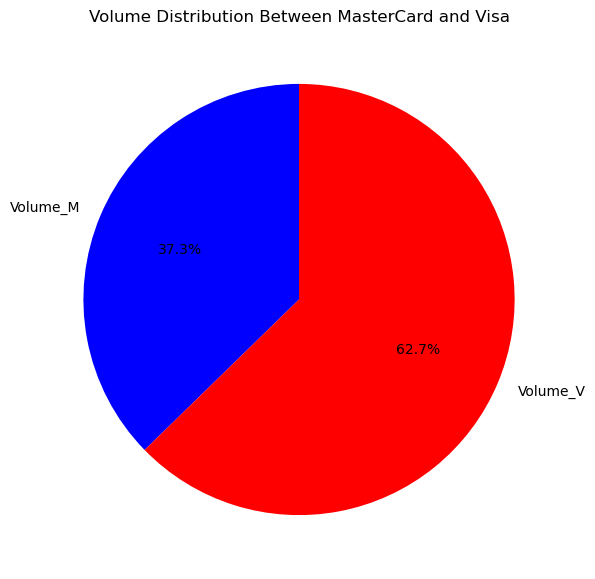

In [14]:
plt.figure(figsize=(14, 7))
df['Total Volume'] = df['Volume_M'] + df['Volume_V']
df[['Volume_M', 'Volume_V']].sum().plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Volume Distribution Between MasterCard and Visa')
plt.ylabel('')
plt.show()

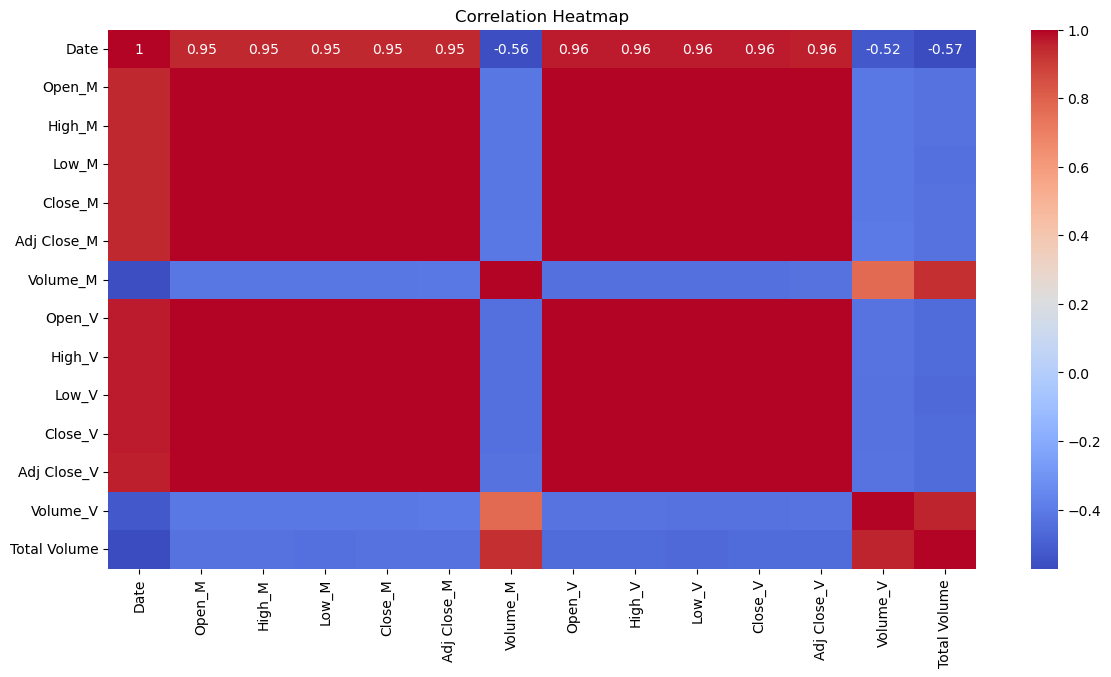

In [15]:
# EDA: Correlation heatmap
plt.figure(figsize=(14, 7))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
#🧹 Data Preprocessing
df.isnull().sum()

Date            0
Open_M          0
High_M          0
Low_M           0
Close_M         0
Adj Close_M     0
Volume_M        0
Open_V          0
High_V          0
Low_V           0
Close_V         0
Adj Close_V     0
Volume_V        0
Total Volume    0
dtype: int64

In [17]:
df.duplicated().sum()

0

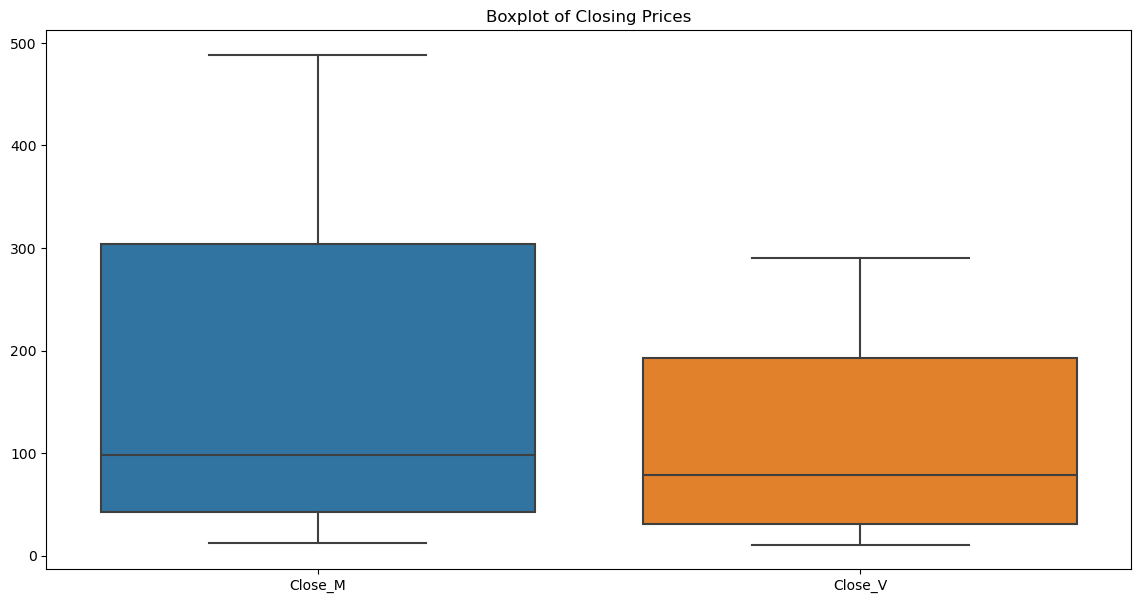

In [18]:
#📉checking for outliers
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[['Close_M', 'Close_V']])
plt.title('Boxplot of Closing Prices')
plt.show()

In [19]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(series, lower_bound, upper_bound)

df['Close_M'] = cap_outliers(df['Close_M'])
df['Close_V'] = cap_outliers(df['Close_V'])

In [20]:
stat, p = shapiro(df['Close_M'])
print('Shapiro-Wilk Test for MasterCard Closing Prices: Statistics=%.3f, p=%.3f' % (stat, p))
stat, p = shapiro(df['Close_V'])
print('Shapiro-Wilk Test for Visa Closing Prices: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test for MasterCard Closing Prices: Statistics=0.862, p=0.000
Shapiro-Wilk Test for Visa Closing Prices: Statistics=0.885, p=0.000


In [21]:
if p < 0.05:
    pt = PowerTransformer()
    df[['Close_M', 'Close_V']] = pt.fit_transform(df[['Close_M', 'Close_V']])